# SAFWC HW-1(A)

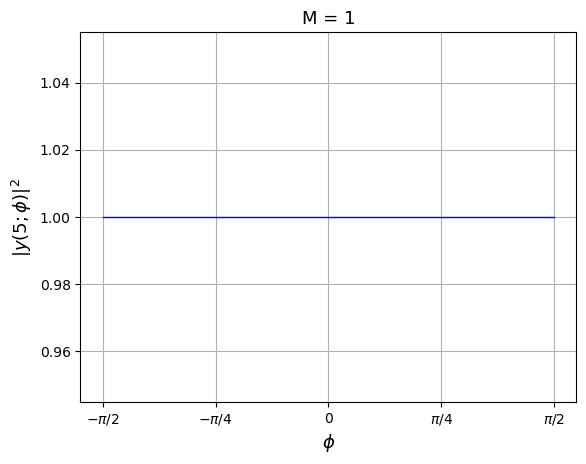

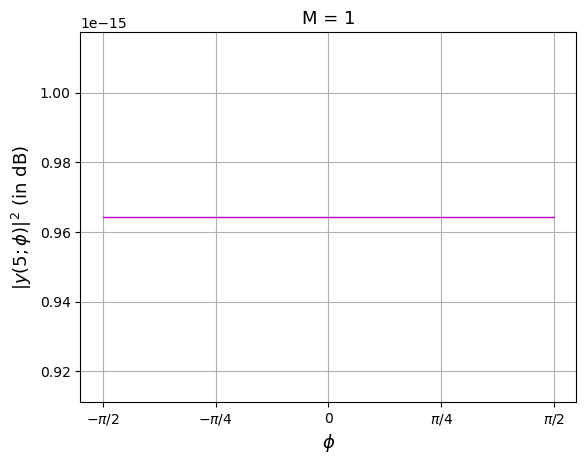

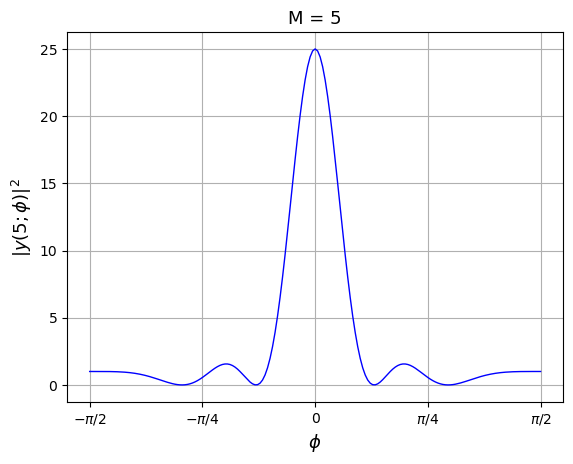

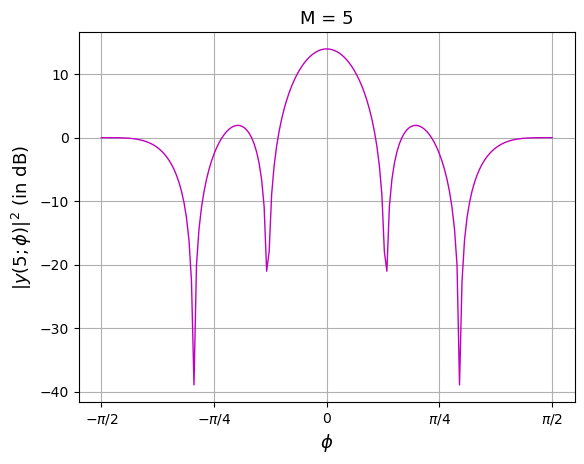

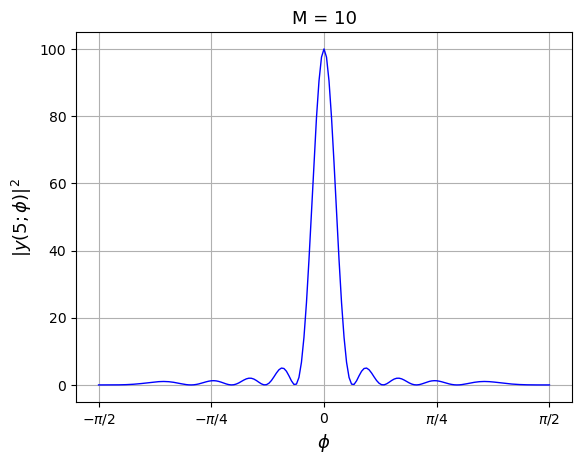

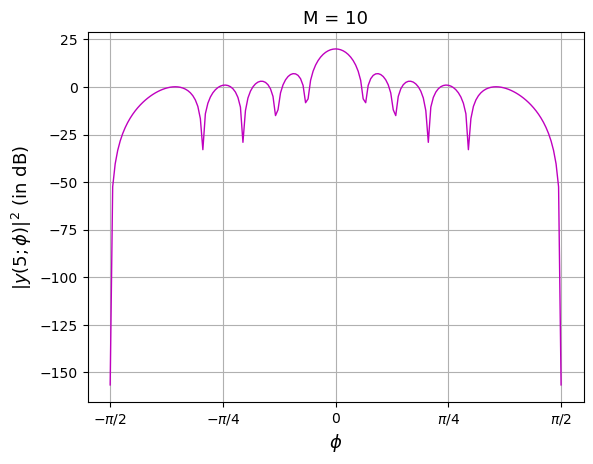

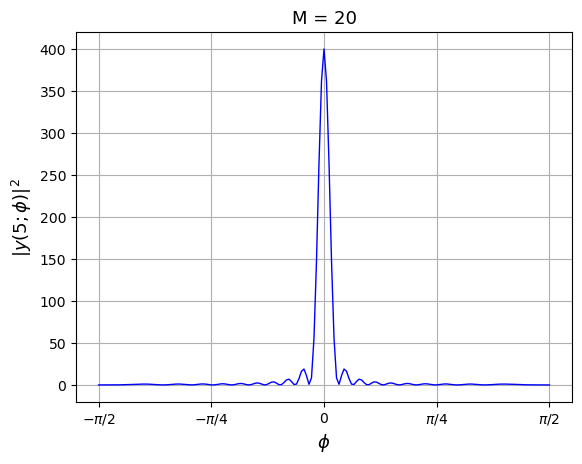

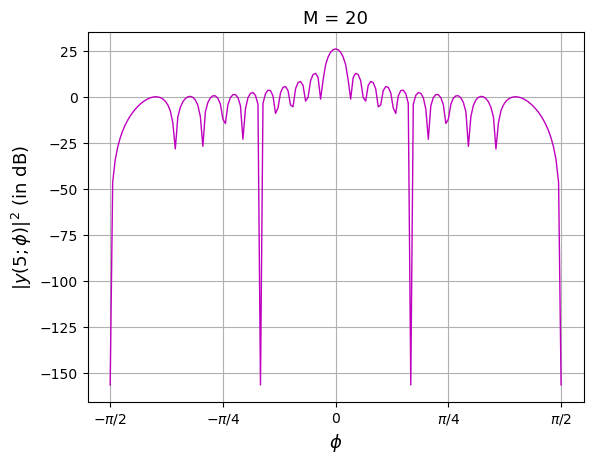

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fc = 2.42 * 10**9  # Carrier frequency in Hz
m1 = 1  # m(1)
b1 = m1 * np.exp(1j * 2 * np.pi * fc * 5)  # Carrier frequency modulated signal b(1)

Maxis = [1, 5, 10, 20]  # Array sizes
pstep = np.pi / 180  # AoA scanning step
paxis = np.arange(-np.pi / 2, np.pi / 2 + pstep, pstep)  # AoA axis
sqmag_y1 = np.zeros((len(Maxis), len(paxis)))  # Initialize power beam pattern

# Main loop
for mind, M in enumerate(Maxis):
    w = np.ones(M)  # Beamformer weights
    
    for pind, phi in enumerate(paxis):
        # Array response vector
        a = np.exp(1j * np.pi * np.sin(phi) * np.arange(M))
        
        # SOI vector
        x1 = b1 * a
        
        # Beamformer output
        y1 = np.dot(w.conj(), x1)
        
        # Magnitude of beamformer output
        sqmag_y1[mind, pind] = np.abs(y1)**2
    
    # Plot in Linear scale
    plt.figure(2 * (mind + 1) + 1)
    plt.plot(paxis, sqmag_y1[mind, :], 'b', linewidth=1)
    plt.ylabel(r'$|y(5; \phi)|^2$', fontsize=13)
    plt.xlabel(r'$\phi$', fontsize=13)
    plt.title(f'M = {M}', fontsize=13)
    plt.grid(True)
    plt.xticks([-np.pi / 2, -np.pi / 4, 0, np.pi / 4, np.pi / 2],
               [r'$-\pi/2$', r'$-\pi/4$', '0', r'$\pi/4$', r'$\pi/2$'])
    plt.savefig(f'fig_{2 * (mind + 1) + 1}.png')
    
    # Plot in dB scale
    plt.figure(2 * (mind + 1) + 2)
    plt.plot(paxis, 10 * np.log10(sqmag_y1[mind, :] + np.finfo(float).eps), 'm', linewidth=1)
    plt.ylabel(r'$|y(5; \phi)|^2$ (in dB)', fontsize=13)
    plt.xlabel(r'$\phi$', fontsize=13)
    plt.title(f'M = {M}', fontsize=13)
    plt.grid(True)
    plt.xticks([-np.pi / 2, -np.pi / 4, 0, np.pi / 4, np.pi / 2],
               [r'$-\pi/2$', r'$-\pi/4$', '0', r'$\pi/4$', r'$\pi/2$'])
    plt.savefig(f'fig_{2 * (mind + 1) + 2}.png')

plt.show()
